In [22]:
import pandas as pd

column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv("data/processed.cleveland.data", names=column_names)
print("Number of features: ", len(df.columns))

df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

df = df.apply(pd.to_numeric)

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print(df.head())
print(df['target'].value_counts())


Number of features:  14
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
target
0    160
1    137
Name: count, dtype: int64


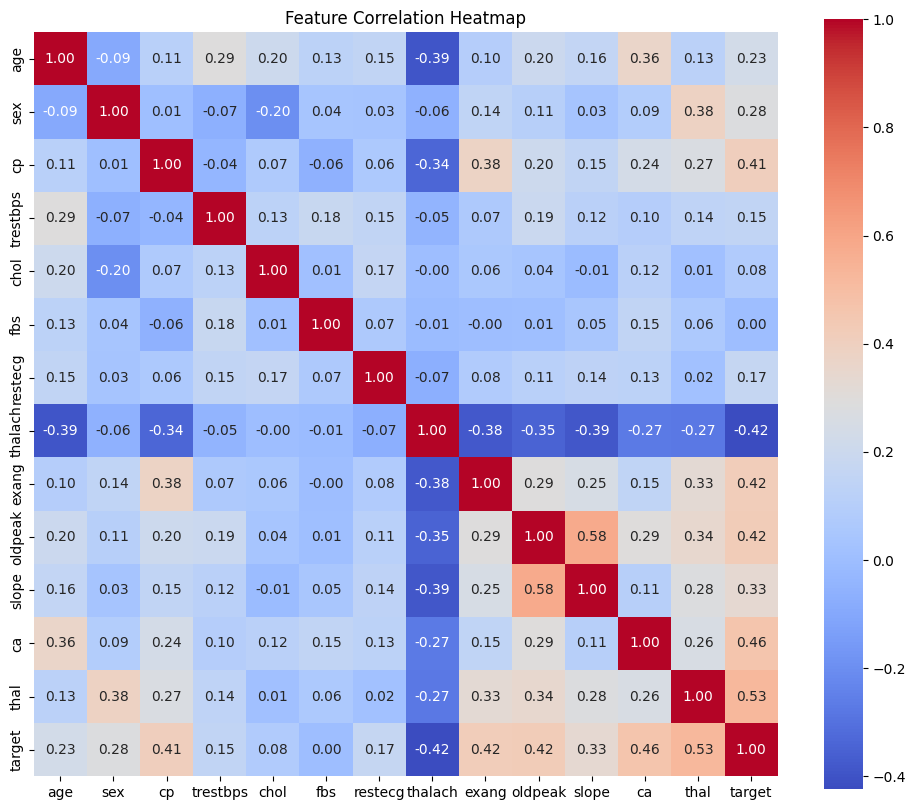

target      1.000000
thal        0.526640
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: target, dtype: float64


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

print(corr_matrix["target"].sort_values(ascending=False))

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


# evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
)

# preprocessing
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),  # Needed for ROC AUC
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, zero_division=0))
    print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))
    
    if y_proba is not None and len(set(y)) == 2: 
        print("ROC AUC:", roc_auc_score(y_test, y_proba))

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


=== Logistic Regression ===
Accuracy: 0.8666666666666667
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334
ROC AUC: 0.9421296296296298
Confusion Matrix:
 [[32  4]
 [ 4 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60


=== Decision Tree ===
Accuracy: 0.7833333333333333
Precision: 0.7037037037037037
Recall: 0.7916666666666666
F1 Score: 0.7450980392156863
ROC AUC: 0.7847222222222221
Confusion Matrix:
 [[28  8]
 [ 5 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81        36
           1       0.70      0.79      0.75        24

    accuracy                           0.78    

/home/arash/.pyenv/versions/3.11.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:59:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [25]:
import pandas as pd

results = {
    'Logistic Regression': {
        'Accuracy': 0.8667,
        'Precision': 0.8333,
        'Recall': 0.8333,
        'F1 Score': 0.8333,
        'ROC AUC': 0.9421
    },
    'Decision Tree': {
        'Accuracy': 0.8167,
        'Precision': 0.7407,
        'Recall': 0.8333,
        'F1 Score': 0.7843,
        'ROC AUC': 0.8194
    },
    'Random Forest': {
        'Accuracy': 0.8833,
        'Precision': 0.84,
        'Recall': 0.875,
        'F1 Score': 0.8571,
        'ROC AUC': 0.9404
    },
    'SVM': {
        'Accuracy': 0.8833,
        'Precision': 0.8696,
        'Recall': 0.8333,
        'F1 Score': 0.8511,
        'ROC AUC': 0.9537
    },
    'KNN': {
        'Accuracy': 0.8333,
        'Precision': 0.8182,
        'Recall': 0.75,
        'F1 Score': 0.7826,
        'ROC AUC': 0.9398
    },
    'XGBoost': {
        'Accuracy': 0.8333,
        'Precision': 0.75,
        'Recall': 0.875,
        'F1 Score': 0.8077,
        'ROC AUC': 0.8947
    },
}

df = pd.DataFrame(results).T
df = df.sort_values(by='F1 Score', ascending=False)
print(df)

                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Random Forest          0.8833     0.8400  0.8750    0.8571   0.9404
SVM                    0.8833     0.8696  0.8333    0.8511   0.9537
Logistic Regression    0.8667     0.8333  0.8333    0.8333   0.9421
XGBoost                0.8333     0.7500  0.8750    0.8077   0.8947
Decision Tree          0.8167     0.7407  0.8333    0.7843   0.8194
KNN                    0.8333     0.8182  0.7500    0.7826   0.9398


In [26]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('svm', SVC(probability=True)),
        ('knn', KNeighborsClassifier()),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ],
    voting='soft'  # use 'hard' for label-based voting
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

print("\n=== Voting Classifier (Soft Voting) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


=== Voting Classifier (Soft Voting) ===
Accuracy: 0.8666666666666667
Precision: 0.8076923076923077
Recall: 0.875
F1 Score: 0.84
ROC AUC: 0.9571759259259259
Confusion Matrix:
 [[31  5]
 [ 3 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



/home/arash/.pyenv/versions/3.11.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:59:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [27]:
from sklearn.ensemble import StackingClassifier

base_learners = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    passthrough=True,  # include original features for meta model
    cv=5
)

stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
y_proba = stacking_clf.predict_proba(X_test)[:, 1]

print("\n=== Stacking Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/home/arash/.pyenv/versions/3.11.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:59:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arash/.pyenv/versions/3.11.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:59:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Stacking Classifier ===
Accuracy: 0.9
Precision: 0.8461538461538461
Recall: 0.9166666666666666
F1 Score: 0.88
ROC AUC: 0.9409722222222221
Confusion Matrix:
 [[32  4]
 [ 2 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



`VIF` stands for Variance Inflation Factor, a diagnostic tool used in regression analysis to detect multicollinearity among independent variables.

Multicollinearity occurs when one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. This messes with your estimates of coefficients — making them unstable and inflating their variances.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))

     feature        VIF
3   trestbps  60.510326
0        age  42.508056
7    thalach  34.207039
4       chol  26.119369
2         cp  13.536880
10     slope  11.714131
12      thal  10.604679
1        sex   3.822194
9    oldpeak   3.164536
6    restecg   2.167770
11        ca   2.042928
8      exang   2.038380
5        fbs   1.249353
